# Evento 2018-07-15

In [1]:
from obspy import read, UTCDateTime

In [8]:
cube = read("c0avx180715000912.pri*")

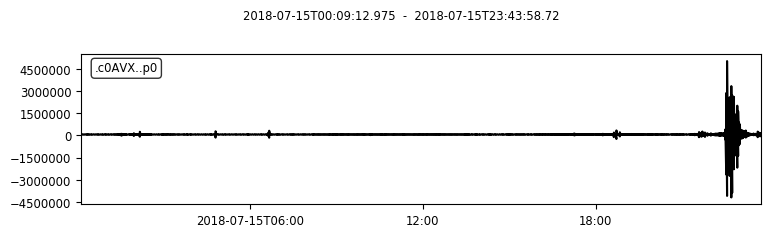

In [9]:
cubetrim = cube.copy()

In [10]:
t1 = UTCDateTime(2018,7,15,21,0,0)
t2 = UTCDateTime(2018,7,15,23,59,59.99)

In [11]:
cubetrim.trim(t1,t2)

3 Trace(s) in Stream:
.c0AVX..p0 | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:43:58.720000Z | 200.0 Hz, 1967745 samples
.c0AVX..p1 | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:43:58.720000Z | 200.0 Hz, 1967745 samples
.c0AVX..p2 | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:43:58.720000Z | 200.0 Hz, 1967745 samples

In [20]:
cubetrim[0].stats

         network: 
         station: c0AVX
        location: 
         channel: p0
       starttime: 2018-07-15T21:00:00.000000Z
         endtime: 2018-07-15T23:43:58.720000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 1967745
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9249, 'encoding': 'STEIM1', 'byteorder': '<', 'record_length': 4096, 'filesize': 37883904})
      processing: ['ObsPy 1.1.0: trim(endtime=UTCDateTime(2018, 7, 15, 23, 59, 59, 990000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2018, 7, 15, 21, 0))']

In [21]:
cubetrim.decimate(factor=2, strict_length=False)

3 Trace(s) in Stream:
.c0AVX..p0 | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:43:58.720000Z | 100.0 Hz, 983873 samples
.c0AVX..p1 | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:43:58.720000Z | 100.0 Hz, 983873 samples
.c0AVX..p2 | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:43:58.720000Z | 100.0 Hz, 983873 samples

In [22]:
cubetrim.write("Cube2018-07-15-Trim100Hz.sac")

In [15]:
ras = read("AM.R9C82.2018-07-15.mseed")

In [16]:
rasZ = ras.select(channel="EHZ")

In [17]:
rasZ.trim(t1,t2)

1 Trace(s) in Stream:
AM.R9C82.00.EHZ | 2018-07-15T21:00:00.002000Z - 2018-07-15T23:59:59.992000Z | 100.0 Hz, 1080000 samples

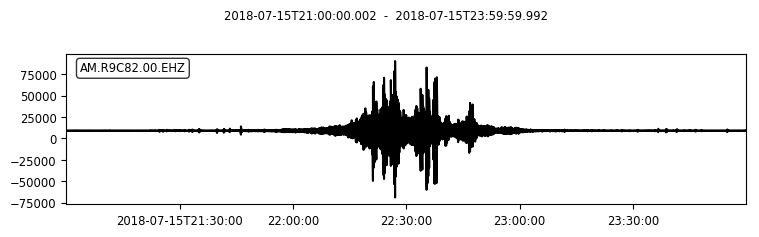

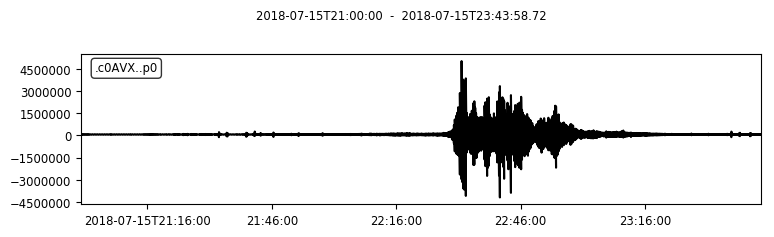

In [23]:
rasZ.plot()
cubetrim.plot()

In [24]:
mngZ = read("UC.MNGR.20180715.mseed")

In [25]:
mngZtrim = mngZ.copy()

In [26]:
mngZtrim.merge(method=0,fill_value="interpolate")
mngZtrim.trim(t1,t2)

4 Trace(s) in Stream:
UC.MNGR..HHN | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:59:59.990000Z | 100.0 Hz, 1080000 samples
UC.MNGR..BDF | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:59:33.140000Z | 100.0 Hz, 1077315 samples
UC.MNGR..HHE | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:59:59.990000Z | 100.0 Hz, 1080000 samples
UC.MNGR..HHZ | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:59:59.990000Z | 100.0 Hz, 1080000 samples

In [44]:
mngInFRa = mng.select(channel="BDF")

In [40]:
mngInFRa.trim(t1,t2)

1 Trace(s) in Stream:
UC.MNGR..BDF | 2018-07-15T21:00:00.000000Z - 2018-07-15T23:59:33.140000Z | 100.0 Hz, 1077315 samples

In [27]:
mngZtrim.write("UC.MNGR.20180715-Trim.sac",format="SAC")

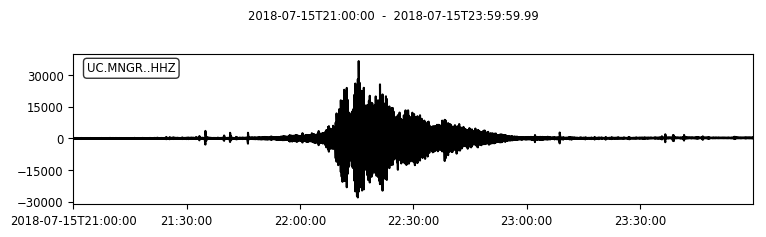

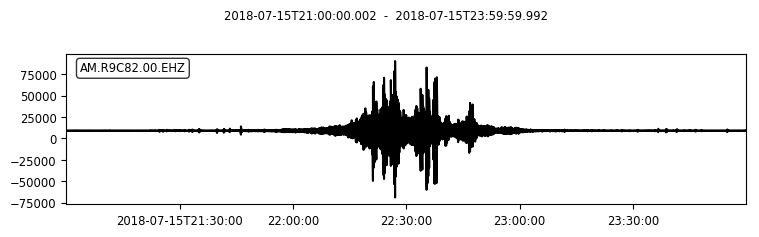

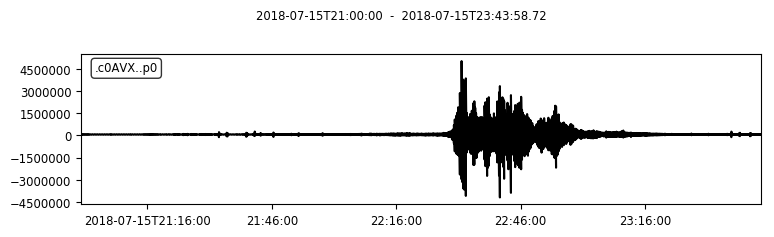

In [31]:
mngZtrim.plot()
rasZ.plot()
cubetrim.plot()

In [32]:
t3 = UTCDateTime(2018,7,15,23,59,59.99)

In [42]:
sT = cubetrim + rasZ + mngZtrim + mngInFRa

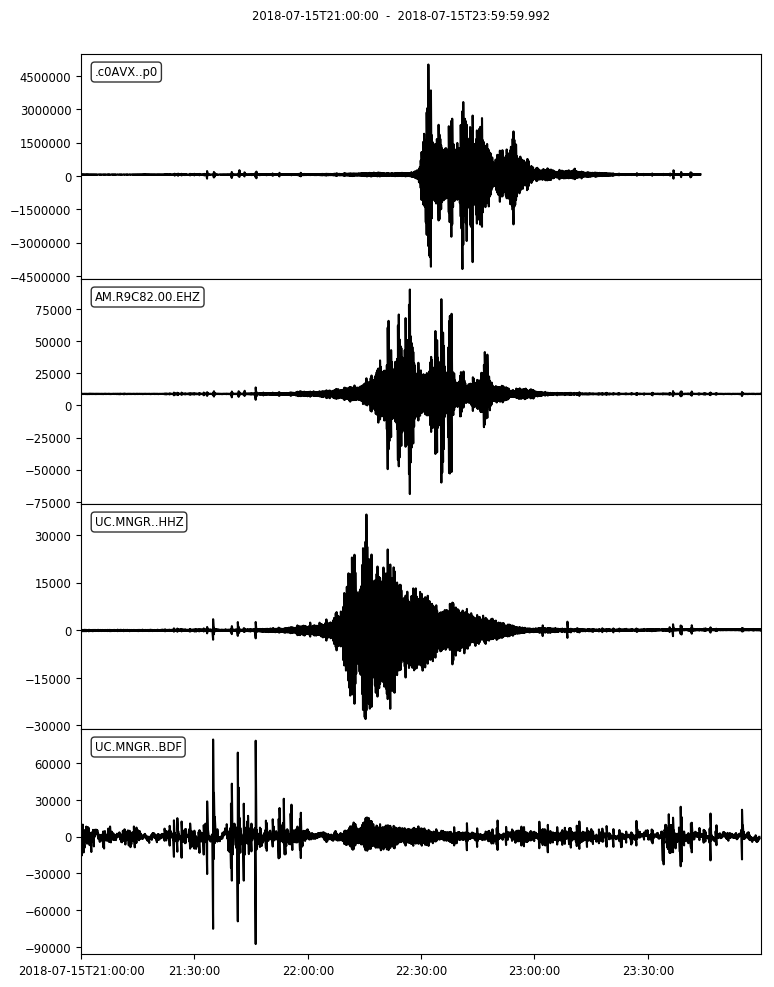

In [43]:
sT.plot(equal_scale=False)

In [45]:
sT.write("Lahar-2018-07-15.mseed",format="MSEED")

/home/marvh/anaconda3/lib/python3.6/site-packages/obspy/io/mseed/core.py:807: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')
/home/marvh/anaconda3/lib/python3.6/site-packages/obspy/io/mseed/core.py:809: UserWarning: File will be written with more than one different record lengths.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'record lengths')
/home/marvh/anaconda3/lib/python3.6/site-packages/obspy/io/mseed/core.py:811: UserWarning: File will be written with more than one different byteorders.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'byteorders')


In [46]:
ls 

20180727.png                 LICENSE
20180728.png                 list.txt
AM.R9C82.00.EHZ20180507.png  LocalFDSN.ipynb
AM.R9C82.2018-05-7.mseed     MNGR-2018-07-09.png
AM.R9C82.2018-07-15.mseed    MNGR-RESCO-2010822.png
AM.R9C82.2018-08-16.mseed    MNGR-RESCO20180715.png
AM.R9C82.2018-08-17.mseed    MNGR-RESCO-20180816.png
AM.R9C82.2018-08-22.mseed    MNGR-RESCO-20180817.png
AM.R9C82.2018-08-23.mseed    MNGR-RESCO-20180823.png
c0avx180715000912.pri0       MNGR-RS-20180715.png
c0avx180715000912.pri1       README.md
c0avx180715000912.pri2       RESCO-BB-20180507.png
Centaur-Geofono20180507.png  UC.LUCIA.2018-05-7.mseed
Lahar-2018-07-15.ipynb       UC.MNGR.20180715.mseed
Lahar-2018-07-15.mseed


In [2]:
prue = read("Lahar-2018-07-15.mseed")

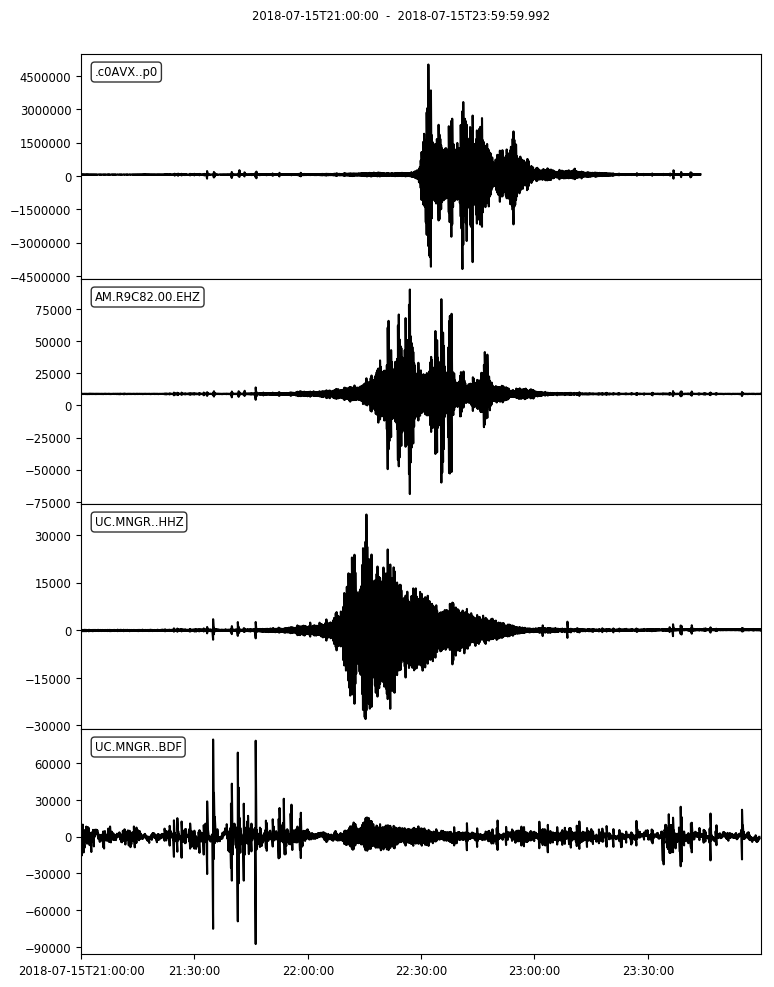

In [4]:
prue.plot(equal_scale=False)

In [5]:
prue.write("Lahar-2018-07-15.sac",format="SAC")